<h1 style="text-align:center;color:#189D9D">Département Génie Informatique, FST de Tanger, MST MDB/SIM (M. AIT KBIR)</h1> 
<h2 style="text-align:center;"> Module "Apprentissage automatique". Perceptron multi-couches.</h2>

<p style="text-align:center;"><Strong style="font-size:15px;">Prédiction du mouvement des prix dans l'indice S&P 500</Strong>: Développer une application pour implémenter les solutions apportées par les modèles</p>

 <h3 style='color:#50B5B5;margin-left:4%'>Réalisé par:</h3>
 <ul style='list-style-type: circle;margin-left:6%'>
  <li> ACHATIBI Hajar</li>
  <li> DAROUY Chaimae</li>
  <li> BOUJELLABA</li>
</ul>

<h3 style='color:#189D9D;margin-left:4%'>Sujet 1:</h3>

Problème de prédiction du mouvement des prix dans l'indice S&P 500, à partir des valeurs 
antérieures de l’indice. Le S&P 500 est un indice boursier basé sur 500 grandes sociétés cotées 
sur les bourses américaines. L'indice est possédé et géré par Standard & Poor's, l'une des trois 
principales sociétés de notation financière du marché boursier américain. Lien de récupération 
des données : https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

<strong>Au cours de ce projet, on va utiliser le modèle de PMC pour la prédiction des s&p_500 pour avoir les résultats d'une journée specifique (6 paramètres) en employant les données des 5 jours précedents.</strong> 

<h2 style="color:#9D181A">1- Installation des packages:</h2>

Ajouter les bibliothèques nécessaires. 

In [44]:
!python -m pip install pandas_datareader

In [45]:
!python -m pip install numpy --upgrade --user

<h2 style="color:#9D181A">2- Manipulation des données:</h2>
<h3 style="color:#189D3C">2.1- Imporation des librairies</h3>

In [46]:
#importation des packages
import pandas as pd 
import numpy as np 
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import random

from datetime import datetime

# Import sklearn 
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.metrics import explained_variance_score,  r2_score

<h3 style="color:#189D3C">2.2- Chargement des données</h3>

<p>Télècharger les données, en utilisant la fonction <strong style="color:red;font-style: italic;">DataReader()</strong> qui prend comme arguments: Le symbole boursier à rechercher sous forme de chaîne dans notre cas c'est <strong style="color:blue">'^GSPC'</strong>, ensuite le site web <strong style="color:blue">'yahoo'</strong> et finalemment le début et la fin des informations, qui sont présentées par des dates, commençons par <strong style="color:blue">'2000-01-01'</strong> et finissant par <strong style="color:blue">'2005-01-01'</strong>.</p>

In [47]:
# importer les données
d_start = datetime(2000, 1, 1)
d_end = datetime(2005, 1, 1)
sp500_data = pdr.DataReader('^GSPC', 'yahoo', d_start, d_end)

# Verifier les 5 premiers lignes du données
sp500_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


Exporter les données dans un fichier <strong style="font-style: italic;">.CSV</strong> pour le bon enregistrement des données.

In [48]:
sp500_data.to_csv(r'sp500_data.csv', index = True)
df= pd.read_csv(r'sp500_data.csv', index_col='Date', parse_dates=True)

Vérifier si les données sont bien télècharger à l'aide de la fonction <strong style="color:red;font-style: italic;">head()</strong> qui affiche les 5 premier lignes du dataFrame. 

In [49]:
# Verify loaded data by displaying the 5 first rows
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


<h3 style="color:#189D3C">2.3-Visualisation des données</h3>

Tracer le graphe correspondant au dataframe.

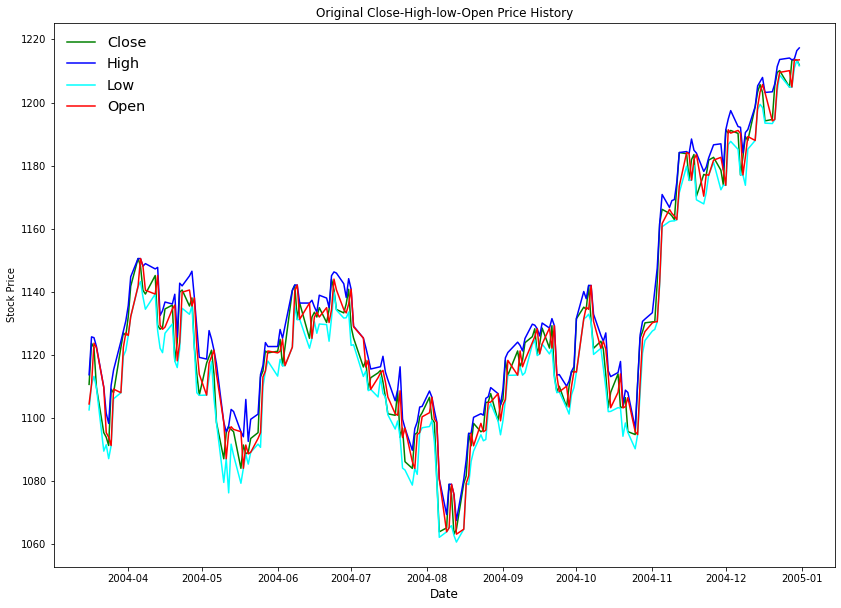

In [50]:
#--------------------------------------------plotting original data-------------------------------------
f, ax = plt.subplots(figsize=(14,10))

# First Subplot:"Close Price History"
ax.plot(sp500_data.index[1054:], sp500_data["Close"][1054:], color="green",label='Close')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Stock Price")
ax.set_title("Original Close-High-low-Open Price History")

# Second Subplot:"High Price History"
ax.plot(sp500_data.index[1054:], sp500_data["High"][1054:], color="blue",label='High')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
ax.plot(sp500_data.index[1054:], sp500_data["Low"][1054:], color="cyan",label='Low')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
ax.plot(sp500_data.index[1054:], sp500_data["Open"][1054:], color="red",label='Open')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Stock Price")

ax.legend(loc='upper left', frameon=False, fontsize='x-large')

<h3 style="color:#189D3C">2.4-Préparation des données</h3>

Transformer dataframe en tableau

In [51]:
# Convert dataFrame to Array
df = df.values

# display array
df

array([[1.47800000e+03, 1.43835999e+03, 1.46925000e+03, 1.45521997e+03,
        9.31800000e+08, 1.45521997e+03],
       [1.45521997e+03, 1.39743005e+03, 1.45521997e+03, 1.39942004e+03,
        1.00900000e+09, 1.39942004e+03],
       [1.41327002e+03, 1.37768005e+03, 1.39942004e+03, 1.40210999e+03,
        1.08550000e+09, 1.40210999e+03],
       ...,
       [1.21384998e+03, 1.21094995e+03, 1.21354004e+03, 1.21344995e+03,
        9.25900000e+08, 1.21344995e+03],
       [1.21646997e+03, 1.21341003e+03, 1.21344995e+03, 1.21355005e+03,
        8.29800000e+08, 1.21355005e+03],
       [1.21732996e+03, 1.21165002e+03, 1.21355005e+03, 1.21192004e+03,
        7.86900000e+08, 1.21192004e+03]])

Séparer les données en ensembles d'entraînement et de test:

In [52]:
# 80% for training data
train = np.array(df[:int(df.shape[0]*0.8)])

# 20% for testing the data
test = np.array(df[int(df.shape[0]*0.8):])
test_Copy = test

Normaliser le nouvel ensemble de données: Nous utiliserons le <strong style="color:red;font-style: italic;">MinMaxScaler</strong> pour mettre nos données à <strong>l'échelle entre zéro et un</strong>. En termes plus simples, la mise à l'échelle convertit les données numériques représentées dans une large plage en une plus petite.

In [53]:
MinMaxscaler = MinMaxScaler(feature_range=(0,1))
train = MinMaxscaler.fit_transform(train)
test = MinMaxscaler.transform(test)

Créer la fonction qui définit les dataSets: plus présisemment, pour les caractéristiques (x),<strong> ajouter les 5 derniers prix</strong>, et pour l'étiquette (y),<strong> ajouter le prix suivant</strong>. Ensuite, utiliser numpy pour le convertir en un tableau (np.array).

In [54]:
def create_dataset(df):
    x = []
    y = []
    for i in range(9, df.shape[0]):
        x.append(df[i-9:i, 0:])
        y.append(df[i, 0:])
    x = np.array(x)
    y = np.array(y)
    return x,y

Créer les données d'entraînement et de test en appelant la fonction <strong style="color:red;font-style: italic;">create_dataset()</strong> pour chacune :

In [55]:
x_train, y_train = create_dataset(train)
x_test, y_test = create_dataset(test)

Enregistrer le contenue de (x_test, y_test) pour l'utiliser dans l'affichage des résultats ultérieurement

In [56]:
x_testCopy, y_testCopy = create_dataset(test_Copy)

Redimensionner les données:
<ul>
    <li> 999, 247 : nombre de lignes respectivement dans x_train et x_test</li>
    <li> 30 : 5x6 nombre de jours <strong>5</strong> fois nombre de paramètres <strong>6</strong></li>
</ul>

In [57]:
n,m,l = x_train.shape
x_train.shape = (n , m*l)

n,m,l = x_test.shape
x_test.shape = (n, m*l)

In [58]:
print("x_test : ", x_test.shape)
print("x_train : ", x_train.shape)
print("y_test : ",y_test.shape)
print("y_train : ",y_train.shape)

x_test :  (243, 54)
x_train :  (995, 54)
y_test :  (243, 6)
y_train :  (995, 6)


<h3 style="color:#189D3C">2.3-Traitement des données</h3>

<strong>Le perceptron multicouche (multilayer perceptron MLP)</strong> est un type de réseau neuronal artificiel organisé en plusieurs couches au sein desquelles une information circule de la couche d'entrée vers la couche de sortie uniquement; il s'agit donc d'un réseau à propagation directe (feedforward). Chaque couche est constituée d'un nombre variable de neurones, les neurones de la dernière couche (dite « de sortie ») étant les sorties du système global.

<strong style="color:blue;">Construire le modèle</strong>:


In [59]:
class MultiLayerPerceptron:
    
    def __init__(self, arch , alpha = 0.1):
        # poids + biais
        self.W = {}
        self.B = {}
        
        # Taux d'adaptation
        self.alpha = alpha
        
        # Architecture :nbre de couches et nombre de neurones par couche
        self.arch = arch
        
        # Initialisation des poids: valeurs issues d'une distribution normale
        for i in np.arange(1,len(self.arch)):
            # Poids
            w = np.random.randn(self.arch[i], self.arch[i-1])
            self.W[i] = w/np.sqrt(self.arch[i])
            # Bias
            b = np.random.randn(self.arch[i],1)
            self.B[i] = b/np.sqrt(self.arch[i])            
            
    def sigmoid(self, x):
        return 1.0/(1 + np.exp(-x))
    
    def dsigmoid(self, x): # x correspond ici à sigmoid(uj(t)), voir le cours
        return x * (1 - x)
    
     # Calcul et mémorisation de l'état de tous les neurones du réseau 
    def forward_pass(self, x):
        a = np.atleast_2d(x).T
        
        stats = {}
        stats[0] = a
        for layer in np.arange(1, len(self.arch)):
            a = self.sigmoid(np.dot(self.W[layer], a) + self.B[layer])
            stats[layer] = a
        return stats    
    
    # Sortie du réseau associée à une entrée X (les états des autres neurones ne sont pas mémorisés)
    def predict(self, X):
        a = np.atleast_2d(X).T
        for layer in np.arange(1, len(self.arch)):
            a = self.sigmoid(np.dot(self.W[layer], a) + self.B[layer])
        return a
    
    # Calcul de l'erreur quadratique moyenne
    def quadratic_loss(self, X, Y):
        Y = np.atleast_2d(Y).T
        predictions = self.predict(X)
        n = X.shape[0]
        loss = (1/n) * 0.5 * np.sum((predictions - Y) ** 2) 
        return loss 
    
    # Calcul des gradients locaux 
    def compute_gradient(self, x, y):
     
        L = len(self.arch) - 1 # indice de la couche de sortie 
        # Gradients
        Gw = {}
        Gb = {}
        A = self.forward_pass(x)
        # Les vecteurs delta  
        D = {}
        y = np.atleast_2d(y).T
        deltaL = (A[L] - y) * self.dsigmoid(A[L])
        D[L] = deltaL # Pour la sortie 
        
        # Calculer les vecteurs delta des autres couches en utilisants les vecteurs delta de la couche suivante
        for l in np.arange(L-1, 0, -1):
            D[l] = (self.W[l+1].T.dot(D[l+1])) * self.dsigmoid(A[l])
        for l in np.arange(L, 0, -1):
            Gb[l] = D[l]
            Gw[l] = D[l].dot(A[l-1].T)        
       
        return (Gw, Gb)
    
    # Mise à jour par rapport à l'erreur moyenne (relative à un bloc d'exemples)
    def update_with_bloc(self, bloc):
      
        m = len(bloc)
        # Gradients locaux
        GCw = {}
        GCb = {}
        # Initialiser à zeros 
        for i in np.arange(1,len(self.arch)):
            GCw[i] = np.zeros(self.W[i].shape)
            GCb[i] = np.zeros(self.B[i].shape)
            
        # Calcul des gradients
        for x, y in bloc:
            Gw, Gb = self.compute_gradient(x, y)
            for i in np.arange(1,len(self.arch)): 
                GCw[i] += Gw[i]
                GCb[i] += Gb[i]
                
        # Mettre à jour les poids 
        for l in np.arange(1,len(self.arch)):
            self.W[l] = self.W[l] - (self.alpha/m)*(GCw[l])
            self.B[l] = self.B[l] - (self.alpha/m)*(GCb[l])
    
    # Iteration: entrainement en utilisant tous les exemples, un bloc de taille bloc_size chaque fois
    def train(self, D, bloc_size):
        train_size = len(D)
        np.random.shuffle(D) # tirage au sort
        blocs = [D[k : k + bloc_size] # Bloc d'exemples
            for k in range(0, train_size, bloc_size)]
        
        for bloc in blocs: # Mise à jour suite au passage de chaque bloc
            self.update_with_bloc(bloc)
  
    # Apprentissage
    def fit(self, X, Y, bloc_size = 20, iterations = 10000, error_min = 0.001, displayPeriod = 5000):
     
        # Exemples avec X et Y Assemblés
        D = list(zip(X,Y))
        
        # Erreurs
        errors = [self.quadratic_loss(X,Y)]   # Erreur initiale    
        
        iter = 0
        print("Itération: {}-{}, Erreur: {:.6f}".format(iter, iterations,errors[iter]))
        while iter < iterations and errors[iter] > error_min: # Tour de boucle 
            
            self.train(D, bloc_size)  # Mettre à jour 
            errors.append(self.quadratic_loss(X,Y))         # Nouvelle erreur
          
            if (iter+1) % displayPeriod == 0:
                print("Itération: {}-{}, Error: {:.6f}".format(iter + 1, iterations,errors[iter]))
            iter += 1
        
        if errors[iter] < error_min: # Erreur inférieur à la valeur minimale
            print("Fin: erreur minimale atteinte : {:.6f}.", errors[iter])
        elif iter == iterations:
            print("Fin: nombre maximum d'itérations atteint.")
       
        return (errors, iter)

<strong style="color:blue;">Entrainement</strong>:

Entrainement de données en utilisant 1000 itération dans les 4 couches (<strong style="color:blue">couche d'entrée:</strong> 30 neurones, <strong style="color:blue">2 couches cachées:</strong> 15 neurones pour chacune et <strong style="color:blue">la couche de sortie:</strong> 6 neurones pour prédire les 6 paramètres).

In [60]:
pmc = MultiLayerPerceptron(arch=[x_train.shape[1], 15, 15, 6], alpha=0.1)
(errs, iter_fin) = pmc.fit(x_train, y_train, iterations=1000, bloc_size=5, error_min=0.00001, displayPeriod=100)

Itération: 0-1000, Erreur: 0.339873
Itération: 100-1000, Error: 0.008365
Itération: 200-1000, Error: 0.007100
Itération: 300-1000, Error: 0.006329
Itération: 400-1000, Error: 0.005736
Itération: 500-1000, Error: 0.005274
Itération: 600-1000, Error: 0.004853
Itération: 700-1000, Error: 0.004599
Itération: 800-1000, Error: 0.004587
Itération: 900-1000, Error: 0.004446
Itération: 1000-1000, Error: 0.004354
Fin: nombre maximum d'itérations atteint.


<strong style="color:blue;">Visualiser la courbe des erreurs</strong>:

Tracer la courbe des erreurs

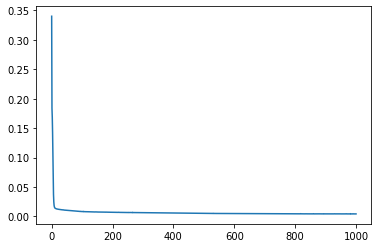

In [61]:
iters = np.arange(0, iter_fin + 1)
plt.plot(iters, errs)
plt.show()

<h3 style="color:#189D3C">2.4 - Manipulations du modèle</h3>

Préparer x_test et y_test pour la prédiction par date.

In [62]:
print()

In [63]:
x_testCopy, y_testCopy = create_dataset(test_Copy)
#rechape x_testCopy
x_testCopy.shape = (243, 54)

# Convert test data to dataframe 
x_testCopy = pd.DataFrame(x_testCopy)
y_testCopy = pd.DataFrame(y_testCopy)

In [64]:
print(x_testCopy.index)
print(1256-243)

RangeIndex(start=0, stop=243, step=1)
1013


In [65]:
# Add Date index
x_testCopy.index = sp500_data.index[1013:]
y_testCopy.index = sp500_data.index[1013:]

Donner une date à prédire

In [66]:
# Test pour un exemple 
randValue = y_testCopy.loc['2004-09-24']
test = x_testCopy.loc['2004-09-24']

#convert dataframe to array
x_testArray = test.values

Mettre l'exemple de test à l'echelle pour prédire le résultat

In [67]:
# 9 days 6 params
x_testArray.shape = (9,6)

#scaling
x_testArray = MinMaxscaler.transform(x_testArray)

#display shape
x_testArray.shape

(9, 6)

Executer la prédiction:

In [68]:
print('Les valeurs réelles : \n'+str(randValue.values))
x_testArray.shape = (1,9*6)

y_predicted = pmc.predict(x_testArray)
y_predicted = MinMaxscaler.inverse_transform(y_predicted.T)
print('\n Sortie prédite : \n'+str(y_predicted)+')' )


Les valeurs réelles : 
[1.11381006e+03 1.10835999e+03 1.10835999e+03 1.11010999e+03
 1.25540000e+09 1.11010999e+03]

 Sortie prédite : 
[[1.10818973e+03 1.09177913e+03 1.10024061e+03 1.10027612e+03
  1.32072696e+09 1.10079195e+03]])


<h3 style="color:#189D3C">2.5 - Evaluation</h3>

In [69]:

#predict all values of x_test
predictions = pmc.predict(x_test)
y_test.shape = (243, 6)

print ("\n Explained_variance_score :")
print(explained_variance_score(y_test, predictions.T))

print ("\n R2_score :")
print(r2_score(y_test, predictions.T))


 Explained_variance_score :
0.8401179820175185

 R2_score :
0.8296916005652896


<h2 style="color:#9D181A">3- Visualisation des résultats:</h2>

Prédire le prix du stock de <strong style="color:#50B5B5;font-style: italic;">'2004-03-16'</strong> jusqu'à <strong style="color:#50B5B5;font-style: italic;">'2004-12-31'</strong> (20% du total des données)

In [70]:
predictions = pmc.predict(x_test)
# Inverse scaler
predictions = predictions.T
predictions = MinMaxscaler.inverse_transform(predictions)
# Convert prediction array to dataframe
df_Result = pd.DataFrame(predictions, columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])
# Add last 20% (test_data) of initial dataframe index as an index for the result dataframe
df_Result.index = sp500_data.index[1013:]

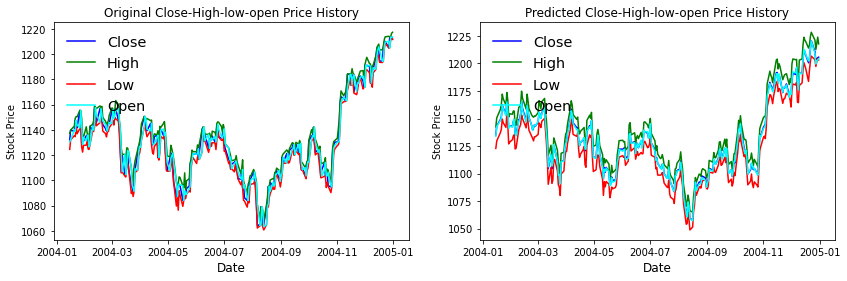

In [71]:
#--------------------------------------------plotting Original+Predicted data-------------------------------------

g, (bx1, bx2) = plt.subplots(1,2, figsize=(14,4))

#-----------------------------------------OriginaL----------------------------------
# First Subplot:"Close Price History"
bx1.plot(sp500_data.index[1013:], sp500_data["Close"][1013:], color="blue", label='Close')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")
bx1.set_title("Original Close-High-low-open Price History")

# Second Subplot:"High Price History"
bx1.plot(sp500_data.index[1013:], sp500_data["High"][1013:], color="green", label='High')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
bx1.plot(sp500_data.index[1013:], sp500_data["Low"][1013:], color="red", label='Low')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
bx1.plot(sp500_data.index[1013:], sp500_data["Open"][1013:], color="cyan", label='Open')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")
bx1.legend(loc='upper left', frameon=False, fontsize='x-large')

#-----------------------------------------Predicted----------------------------------
# First Subplot:"Close Price History"
bx2.plot(df_Result.index, df_Result["Close"], color="blue", label='Close')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")
bx2.set_title("Predicted Close-High-low-open Price History")

# Second Subplot:"High Price History"
bx2.plot(df_Result.index, df_Result["High"], color="green", label='High')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
bx2.plot(df_Result.index, df_Result["Low"], color="red", label='Low')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
bx2.plot(df_Result.index, df_Result["Open"], color="cyan" , label='Open')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")
bx2.legend(loc='upper left', frameon=False, fontsize='x-large')

plt.show()

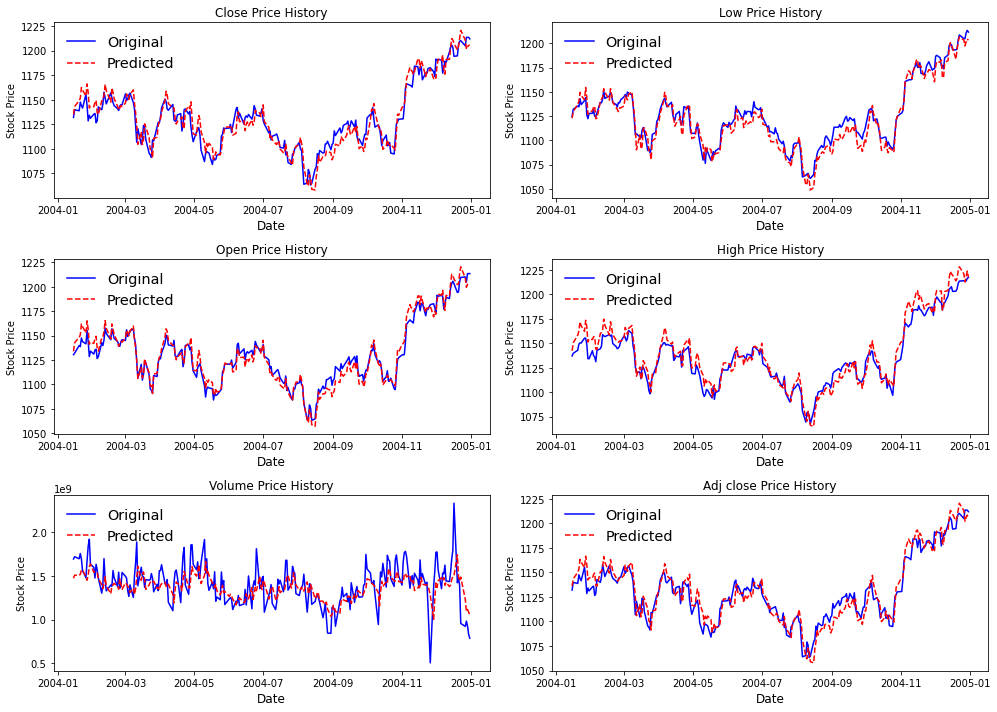

In [72]:
f, (axes) = plt.subplots(3,2, figsize=(14,10))
#=============================================================================================== CLOSE
# First Subplot:"Close Price History"
axes[0,0].plot(sp500_data.index[1013:], sp500_data["Close"][1013:], color="blue", label ='Original')
axes[0,0].set_xlabel("Date", fontsize=12)
axes[0,0].set_ylabel("Stock Price")
axes[0,0].set_title("Close Price History")

# Second Subplot:"Close Price History"
axes[0,0].plot(df_Result.index, df_Result["Close"], 'r--', label ='Predicted')
axes[0,0].set_xlabel("Date", fontsize=12)
axes[0,0].set_ylabel("Stock Price")
axes[0,0].legend(loc='upper left', frameon=False, fontsize='x-large')

#============================================================================================= LOW
# First Subplot:"Low Price History"
axes[0,1].plot(sp500_data.index[1013:], sp500_data["Low"][1013:], color="blue", label ='Original')
axes[0,1].set_xlabel("Date", fontsize=12)
axes[0,1].set_ylabel("Stock Price")
axes[0,1].set_title("Low Price History")

# Second Subplot:"Low Price History"
axes[0,1].plot(df_Result.index, df_Result["Low"],'r--', label ='Predicted')
axes[0,1].set_xlabel("Date", fontsize=12)
axes[0,1].set_ylabel("Stock Price")
axes[0,1].legend(loc='upper left', frameon=False, fontsize='x-large')

#============================================================================================= OPEN
# First Subplot:"Open Price History"
axes[1,0].plot(sp500_data.index[1013:], sp500_data["Open"][1013:], color="blue", label ='Original')
axes[1,0].set_xlabel("Date", fontsize=12)
axes[1,0].set_ylabel("Stock Price")
axes[1,0].set_title("Open Price History")

# Second Subplot:"Open Price History"
axes[1,0].plot(df_Result.index, df_Result["Open"], 'r--', label ='Predicted')
axes[1,0].set_xlabel("Date", fontsize=12)
axes[1,0].set_ylabel("Stock Price")
axes[1,0].legend(loc='upper left', frameon=False, fontsize='x-large')

#============================================================================================= HIGH
# First Subplot:"High Price History"
axes[1,1].plot(sp500_data.index[1013:], sp500_data["High"][1013:], color="blue", label ='Original')
axes[1,1].set_xlabel("Date", fontsize=12)
axes[1,1].set_ylabel("Stock Price")
axes[1,1].set_title("High Price History")

# Second Subplot:"High Price History"
axes[1,1].plot(df_Result.index, df_Result["High"],'r--', label ='Predicted')
axes[1,1].set_xlabel("Date", fontsize=12)
axes[1,1].set_ylabel("Stock Price")
axes[1,1].legend(loc='upper left', frameon=False, fontsize='x-large')

#============================================================================================= VOLUME PRICE
# First Subplot:"Volume Price History"
axes[2,0].plot(sp500_data.index[1013:], sp500_data["Volume"][1013:], color="blue", label ='Original')
axes[2,0].set_xlabel("Date", fontsize=12)
axes[2,0].set_ylabel("Stock Price")
axes[2,0].set_title("Volume Price History")

# Second Subplot:"Volume Price History"
axes[2,0].plot(df_Result.index, df_Result["Volume"],'r--', label ='Predicted')
axes[2,0].set_xlabel("Date", fontsize=12)
axes[2,0].set_ylabel("Stock Price")
axes[2,0].legend(loc='upper left', frameon=False, fontsize='x-large')

#============================================================================================== ADJ CLOSE
# First Subplot:"Adj close Price History"
axes[2,1].plot(sp500_data.index[1013:], sp500_data["Adj Close"][1013:], color="blue", label ='Original')
axes[2,1].set_xlabel("Date", fontsize=12)
axes[2,1].set_ylabel("Stock Price")
axes[2,1].set_title("Adj close Price History")

# Second Subplot:"Adj close Price History"
axes[2,1].plot(df_Result.index, df_Result["Adj Close"],'r--', label ='Predicted')
axes[2,1].set_xlabel("Date", fontsize=12)
axes[2,1].set_ylabel("Stock Price")
axes[2,1].legend(loc='upper left', frameon=False, fontsize='x-large')

plt.tight_layout()
plt.show()

In [ ]:
def predict_future(date,):

In [77]:
# Test pour un exemple 
randValue = y_testCopy.loc['2004-09-24']
test = x_testCopy.loc['2004-09-24']

In [73]:


#convert dataframe to array
x_testArray = test.values

# 9 days 6 params
x_testArray.shape = (9,6)

#scaling
x_testArray = MinMaxscaler.transform(x_testArray)

#display shape
x_testArray.shape

print('Les valeurs réelles : \n'+str(randValue.values))
x_testArray.shape = (1,9*6)

y_predicted = pmc.predict(x_testArray)
y_predicted = MinMaxscaler.inverse_transform(y_predicted.T)
print('\n Sortie prédite : \n'+str(y_predicted)+')' )


Les valeurs réelles : 
[1.11381006e+03 1.10835999e+03 1.10835999e+03 1.11010999e+03
 1.25540000e+09 1.11010999e+03]

 Sortie prédite : 
[[1.10818973e+03 1.09177913e+03 1.10024061e+03 1.10027612e+03
  1.32072696e+09 1.10079195e+03]])
